In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Modélisation Naïve 1

In [76]:
df = pd.read_csv('Sources/df_final_rolling_ready_50_with_bookodds.csv')

In [77]:
# suppression des colonnes pour modélisations naïves 1 sur dataset avant enrichissement
col_to_drop = ['player_1_height_cm',
               'player_1_weight_kg',
               'player_1_handedness',
               'player_1_backhand',
               'player_1_at_home',
               'player_1_age',
               'player_1_nb_year_xp',
               'player_1_match_duration',
               'player_1_nb_sets',
               'player_1_nb_games',
               'player_1_nb_tiebreaks',
               'player_1_nb_points',
               'player_1_sets_won',
               'player_1_games_won',
               'player_1_tiebreaks_won',
               'player_1_points_won',
               'player_1_serve_rating',
               'player_1_aces',
               'player_1_double_faults',
               'player_1_first_serves_in',
               'player_1_first_serves_total',
               'player_1_first_serve_points_won',
               'player_1_first_serve_points_total',
               'player_1_second_serve_points_won',
               'player_1_second_serve_points_total',
               'player_1_break_points_saved',
               'player_1_break_points_serve_total',
               'player_1_service_games_played',
               'player_1_return_rating',
               'player_1_first_serve_return_won',
               'player_1_first_serve_return_total',
               'player_1_second_serve_return_won',
               'player_1_second_serve_return_total',
               'player_1_break_points_converted',
               'player_1_break_points_return_total',
               'player_1_return_games_played',
               'player_1_service_points_won',
               'player_1_service_points_total',
               'player_1_return_points_won',
               'player_1_return_points_total',
               'player_1_under_pressure_rating',
               'player_1_win_rate',
               'player_1_B365',
               'player_1_PS',
               'player_2_height_cm',
               'player_2_weight_kg',
               'player_2_handedness',
               'player_2_backhand',
               'player_2_at_home',
               'player_2_age',
               'player_2_nb_year_xp',
               'player_2_match_duration',
               'player_2_nb_sets',
               'player_2_nb_games',
               'player_2_nb_tiebreaks',
               'player_2_nb_points',
               'player_2_sets_won',
               'player_2_games_won',
               'player_2_tiebreaks_won',
               'player_2_points_won',
               'player_2_serve_rating',
               'player_2_aces',
               'player_2_double_faults',
               'player_2_first_serves_in',
               'player_2_first_serves_total',
               'player_2_first_serve_points_won',
               'player_2_first_serve_points_total',
               'player_2_second_serve_points_won',
               'player_2_second_serve_points_total',
               'player_2_break_points_saved',
               'player_2_break_points_serve_total',
               'player_2_service_games_played',
               'player_2_return_rating',
               'player_2_first_serve_return_won',
               'player_2_first_serve_return_total',
               'player_2_second_serve_return_won',
               'player_2_second_serve_return_total',
               'player_2_break_points_converted',
               'player_2_break_points_return_total',
               'player_2_return_games_played',
               'player_2_service_points_won',
               'player_2_service_points_total',
               'player_2_return_points_won',
               'player_2_return_points_total',
               'player_2_under_pressure_rating',
               'player_2_win_rate', 
               'player_2_B365', 
               'player_2_PS', 
               'prize_money_euro']

df_naif_1 = df.drop(col_to_drop, axis=1)

In [78]:
# Encodage de player_1_name et player_2_name
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(pd.concat([df_naif_1['player_1_name'], df_naif_1['player_2_name']], axis=0))
df_naif_1['player_1_name_encoded'] = le.transform(df_naif_1['player_1_name'])
df_naif_1['player_2_name_encoded'] = le.transform(df_naif_1['player_2_name'])

In [79]:
# Suppression de player_1_name et player_2_name
df_naif_1.drop(['player_1_name', 'player_2_name'], axis=1, inplace=True)

In [80]:
# dichotomisation
df_naif_1 = pd.get_dummies(df_naif_1)

In [81]:
# séparation en train et test selon le temps
nb_rows_train = int(round(len(df_naif_1)*0.7,0))
X_train = df_naif_1.drop('player_1_win', axis=1)[:nb_rows_train]
y_train = df_naif_1['player_1_win'][:nb_rows_train]
X_test = df_naif_1.drop('player_1_win', axis=1)[nb_rows_train:]
y_test = df_naif_1['player_1_win'][nb_rows_train:]

In [82]:
# Normalisation et Standardisation des features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
# Modélisations naïves 1
clf_lr = LogisticRegression(random_state=0)
clf_rf = RandomForestClassifier(random_state=0)
clf_knn = KNeighborsClassifier()
clf_svc = SVC(random_state=0)
clf_lr.fit(X_train_scaled, y_train)
clf_rf.fit(X_train_scaled, y_train)
clf_knn.fit(X_train_scaled, y_train)
clf_svc.fit(X_train_scaled, y_train)
print(f'LR: {clf_lr.score(X_test_scaled, y_test)*100:.2f}')
print(f'RF: {clf_rf.score(X_test_scaled, y_test)*100:.2f}')
print(f'KNN: {clf_knn.score(X_test_scaled, y_test)*100:.2f}')
print(f'SVC: {clf_svc.score(X_test_scaled, y_test)*100:.2f}')

LR: 62.49
RF: 62.76
KNN: 55.71
SVC: 61.58


# Modélisation Naïve 2

In [84]:
# Modélisation Naïves 2 après enrichissement du dataset (sans les bookmakers)
rollings=['10', '30', '50', '100', '150', '200']
lr_test_acc_1=[]
rf_test_acc_1=[]
knn_test_acc_1=[]
svc_test_acc_1=[]

for rolling in rollings:
    df = pd.read_csv('Sources/df_final_rolling_ready_'+rolling+'_with_bookodds.csv')
    df.drop(['player_1_B365', 'player_2_B365', 'player_1_PS', 'player_2_PS'], axis=1, inplace=True)
    
    # Encodage
    le = LabelEncoder()
    le.fit(pd.concat([df['player_1_name'], df['player_2_name']], axis=0))
    df['player_1_name_encoded'] = le.transform(df['player_1_name'])
    df['player_2_name_encoded'] = le.transform(df['player_2_name'])
    
    # Suppression player_1_name & player_2
    df.drop(['player_1_name', 'player_2_name'], axis=1, inplace=True)
    
    # Dichotomisation
    df = pd.get_dummies(df)
    
    # Split
    nb_rows_train = int(round(len(df)*0.7,0))
    X_train = df.drop('player_1_win', axis=1)[:nb_rows_train]
    y_train = df['player_1_win'][:nb_rows_train]
    X_test = df.drop('player_1_win', axis=1)[nb_rows_train:]
    y_test = df['player_1_win'][nb_rows_train:]
    
    # Standardisation
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Modélisations naïves 2
    clf_lr = LogisticRegression(random_state=0)
    clf_rf = RandomForestClassifier(random_state=0)
    clf_knn = KNeighborsClassifier()
    clf_svc = SVC(random_state=0)
    
    clf_lr.fit(X_train_scaled, y_train)
    clf_rf.fit(X_train_scaled, y_train)
    clf_knn.fit(X_train_scaled, y_train)
    clf_svc.fit(X_train_scaled, y_train)
    
    lr_test_acc_1.append(clf_lr.score(X_test_scaled, y_test))
    rf_test_acc_1.append(clf_rf.score(X_test_scaled, y_test))
    knn_test_acc_1.append(clf_knn.score(X_test_scaled, y_test))
    svc_test_acc_1.append(clf_svc.score(X_test_scaled, y_test))

C:\Users\enovap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\enovap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [85]:
print('Meilleurs accuracy:')
print('LR:', str(round(np.max(lr_test_acc_1)*100,2)), '% pour une moyenne mobile sur', rollings[round(np.argmax(lr_test_acc_1),0)],'matchs')
print('RF:', str(round(np.max(rf_test_acc_1)*100,2)), '% pour une moyenne mobile sur', rollings[round(np.argmax(rf_test_acc_1),0)],'matchs')
print('KNN:', str(round(np.max(knn_test_acc_1)*100,2)), '% pour une moyenne mobile sur', rollings[round(np.argmax(knn_test_acc_1),0)],'matchs')
print('SVC:', str(round(np.max(svc_test_acc_1)*100,2)), '% pour une moyenne mobile sur', rollings[round(np.argmax(svc_test_acc_1),0)],'matchs')

Meilleurs accuracy:
LR: 63.95 % pour une moyenne mobile sur 100 matchs
RF: 64.57 % pour une moyenne mobile sur 50 matchs
KNN: 58.72 % pour une moyenne mobile sur 50 matchs
SVC: 64.62 % pour une moyenne mobile sur 200 matchs


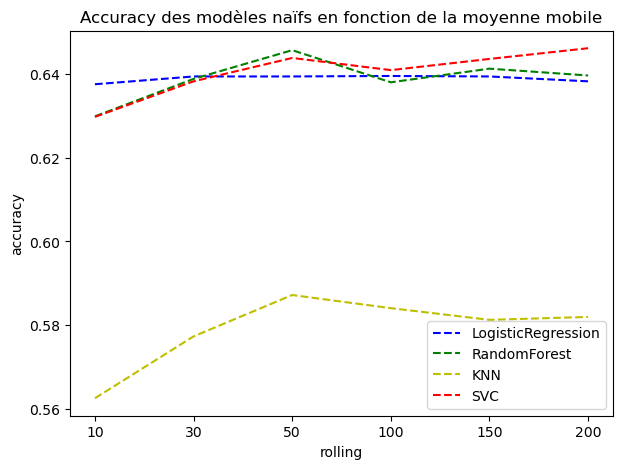

In [87]:
plt.figure(figsize=[7, 5])
plt.plot(rollings, lr_test_acc_1, 'b--', label='LogisticRegression')
plt.plot(rollings, rf_test_acc_1, 'g--', label='RandomForest')
plt.plot(rollings, knn_test_acc_1, 'y--', label='KNN')
plt.plot(rollings, svc_test_acc_1, 'r--', label='SVC')
plt.legend()
plt.title('Accuracy des modèles naïfs en fonction de la moyenne mobile')
plt.xlabel('rolling')
plt.ylabel('accuracy')
plt.show()

# Modélisation Naïve 3

In [88]:
# Modélisation Naïves 3 après enrichissement du dataset (avec les bookmakers)
rollings=['10', '30', '50', '100', '150', '200']
lr_test_acc_2=[]
rf_test_acc_2=[]
knn_test_acc_2=[]
svc_test_acc_2=[]

for rolling in rollings:
    
    df = pd.read_csv('Sources/df_final_rolling_ready_'+rolling+'_with_bookodds.csv')
    
    # Encodage
    le = LabelEncoder()
    le.fit(pd.concat([df['player_1_name'], df['player_2_name']], axis=0))
    df['player_1_name_encoded'] = le.transform(df['player_1_name'])
    df['player_2_name_encoded'] = le.transform(df['player_2_name'])
    
    # Suppression player_1_name & player_2
    df.drop(['player_1_name', 'player_2_name'], axis=1, inplace=True)
    
    # Dichotomisation
    df = pd.get_dummies(df)
    
    # Split
    nb_rows_train = int(round(len(df)*0.7,0))
    X_train = df.drop('player_1_win', axis=1)[:nb_rows_train]
    y_train = df['player_1_win'][:nb_rows_train]
    X_test = df.drop('player_1_win', axis=1)[nb_rows_train:]
    y_test = df['player_1_win'][nb_rows_train:]
    
    # Standardisation
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Modélisations naïves 2
    clf_lr = LogisticRegression(random_state=0)
    clf_rf = RandomForestClassifier(random_state=0)
    clf_knn = KNeighborsClassifier()
    clf_svc = SVC(random_state=0)
    
    clf_lr.fit(X_train_scaled, y_train)
    clf_rf.fit(X_train_scaled, y_train)
    clf_knn.fit(X_train_scaled, y_train)
    clf_svc.fit(X_train_scaled, y_train)
    
    lr_test_acc_2.append(clf_lr.score(X_test_scaled, y_test))
    rf_test_acc_2.append(clf_rf.score(X_test_scaled, y_test))
    knn_test_acc_2.append(clf_knn.score(X_test_scaled, y_test))
    svc_test_acc_2.append(clf_svc.score(X_test_scaled, y_test))

C:\Users\enovap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\enovap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [89]:
print('Meilleurs accuracy:')
print('LR:', str(round(np.max(lr_test_acc_2)*100,2)), '% pour une moyenne mobile sur', rollings[round(np.argmax(lr_test_acc_2),0)],'matchs')
print('RF:', str(round(np.max(rf_test_acc_2)*100,2)), '% pour une moyenne mobile sur', rollings[round(np.argmax(rf_test_acc_2),0)],'matchs')
print('KNN:', str(round(np.max(knn_test_acc_2)*100,2)), '% pour une moyenne mobile sur', rollings[round(np.argmax(knn_test_acc_2),0)],'matchs')
print('SVC:', str(round(np.max(svc_test_acc_2)*100,2)), '% pour une moyenne mobile sur', rollings[round(np.argmax(svc_test_acc_2),0)],'matchs')

Meilleurs accuracy:
LR: 67.06 % pour une moyenne mobile sur 10 matchs
RF: 67.21 % pour une moyenne mobile sur 100 matchs
KNN: 59.03 % pour une moyenne mobile sur 100 matchs
SVC: 66.7 % pour une moyenne mobile sur 200 matchs


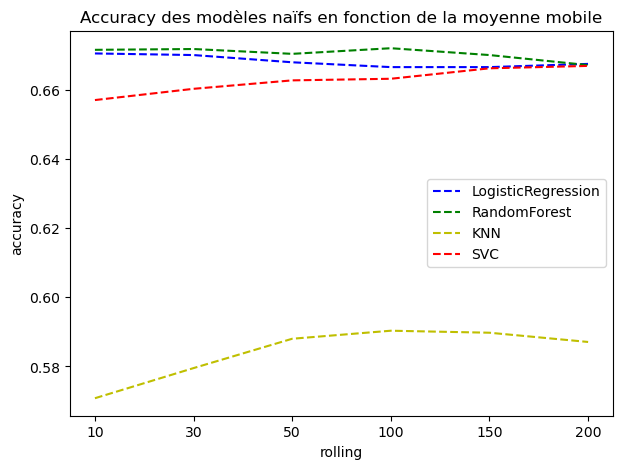

In [92]:
plt.figure(figsize=[7, 5])
plt.plot(rollings, lr_test_acc_2, 'b--', label='LogisticRegression')
plt.plot(rollings, rf_test_acc_2, 'g--', label='RandomForest')
plt.plot(rollings, knn_test_acc_2, 'y--', label='KNN')
plt.plot(rollings, svc_test_acc_2, 'r--', label='SVC')
plt.legend()
plt.title('Accuracy des modèles naïfs en fonction de la moyenne mobile')
plt.xlabel('rolling')
plt.ylabel('accuracy')
plt.show()